In [1]:
# load data
from hydro_raster.Raster import Raster
from hydro_raster import get_sample_data
from hydro_raster.grid_show import plot_shape_file
tif_file_name = get_sample_data('tif')
ras_obj = Raster(tif_file_name)
shp_file_name = get_sample_data('shp')

plot maps: nomral map an ranked map

[ 0.         10.         20.         30.         40.         50.
 66.62203979]


(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

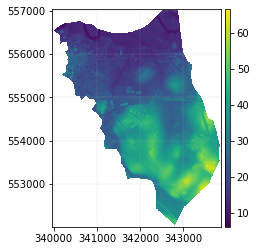

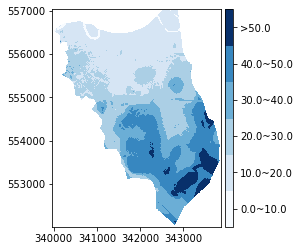

In [2]:
fig, ax = ras_obj.mapshow()
ras_obj.rankshow(breaks=[0, 10, 20, 30, 40, 50])

clip raster

In [3]:
clip_extent = (340761, 341528, 554668, 555682) # left, right, bottom, top
ras_obj_cut = ras_obj.rect_clip(clip_extent) # raster can be cutted by a shapfile as well using clip function

plot shapefile

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

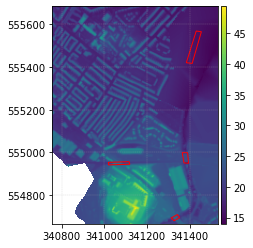

In [4]:
fig, ax = ras_obj_cut.mapshow()
plot_shape_file(shp_file_name, ax=ax, edgecolor='r', linewidth=1)

a) Rasterize polygons on a raster and return an index array with the same dimension of the raster array

b) Change raster cell values within the polygons by adding a fixed value, values can also be changed based on the attributes of each shapefile features

In [5]:
shp_file_name = get_sample_data('shp')
index_array = ras_obj_cut.rasterize(shp_file_name)
ras_obj_new = ras_obj_cut.duplicate()
add_value = 20
ras_obj_new.array[index_array] = ras_obj_cut.array[index_array]+add_value

Show the edited raster with the shapefile polygons

(<Figure size 1440x720 with 4 Axes>, <AxesSubplot:>)

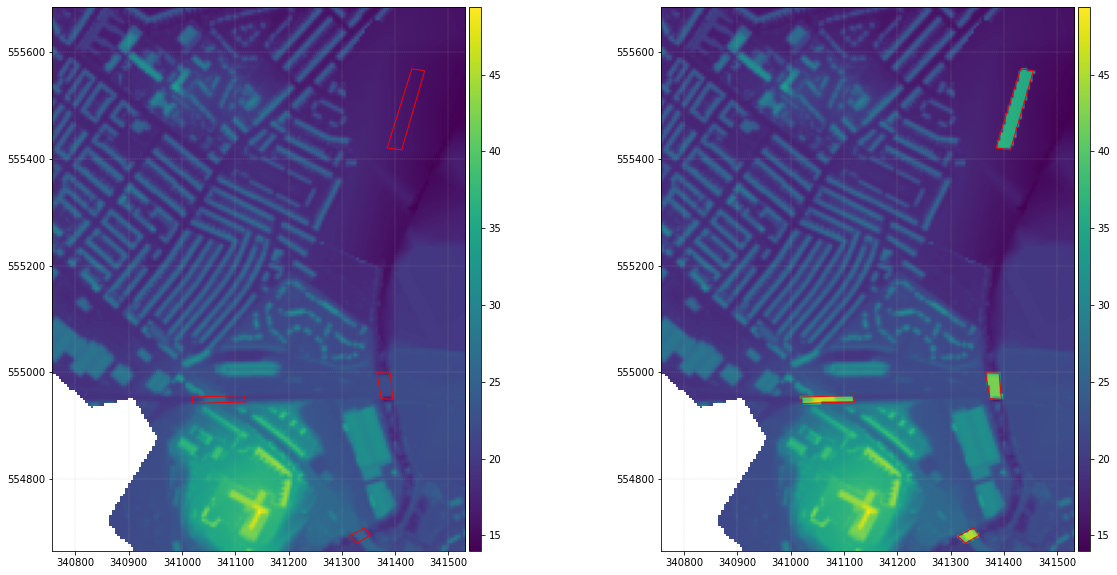

In [6]:
import matplotlib.pyplot as plt
from hydro_raster.grid_show import plot_shape_file
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ras_obj_cut.mapshow(ax=ax[0])
plot_shape_file(shp_file_name, ax=ax[0], edgecolor='r', linewidth=1)
ras_obj_new.mapshow(ax=ax[1])
plot_shape_file(shp_file_name, ax=ax[1], edgecolor='r', linewidth=1)
